In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
dataset = pd.read_csv("wine.csv")

In [37]:
dataset.shape

(178, 14)

In [38]:
dataset.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [39]:
X = dataset.iloc[:,[0,5]].values
Y = dataset.iloc[:,13].values

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.3, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [43]:
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[19  0  0]
 [ 4 16  2]
 [ 1  1 11]]
Training acc: 0.8467741935483871
Test acc: 0.8518518518518519


Podejrzenie overfittingu

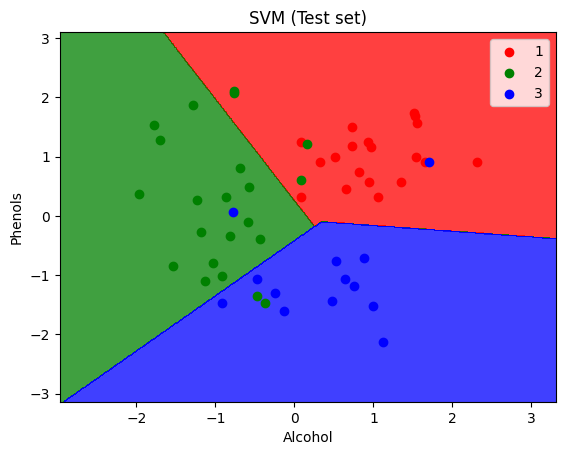

In [45]:
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01)
                     )
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()                     

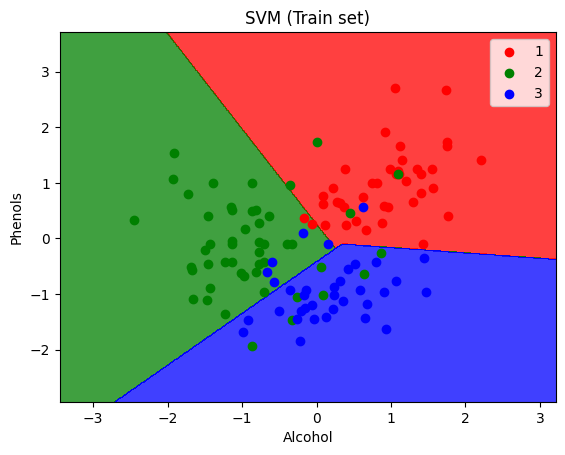

In [46]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()     

In [47]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[19  0  0]
 [ 2 18  2]
 [ 1  1 11]]
Training acc: 0.8790322580645161
Test acc: 0.8888888888888888


Podejrzenie overfittingu

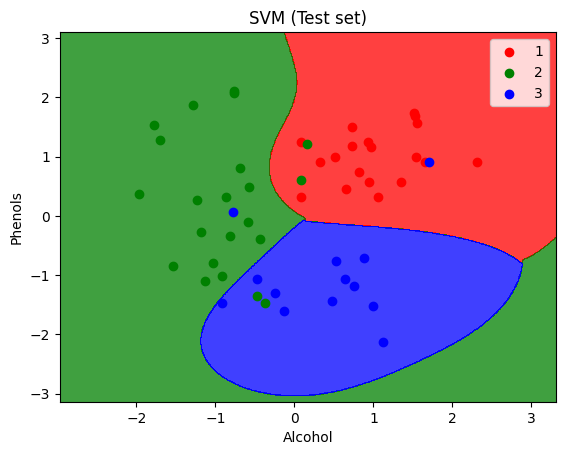

In [48]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()     

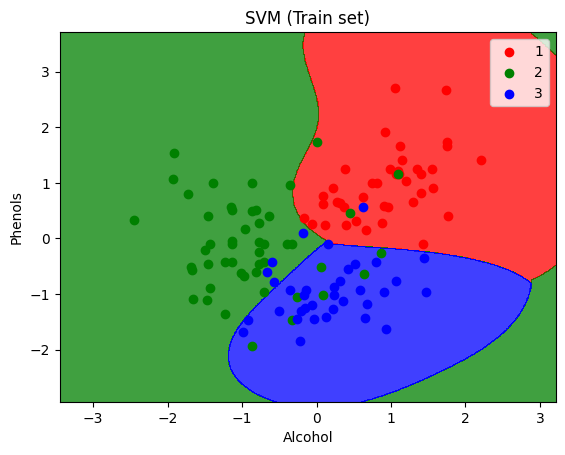

In [49]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()      

In [50]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[15  4  0]
 [ 0 20  2]
 [ 1  1 11]]
Training acc: 0.7580645161290323
Test acc: 0.8518518518518519


Podejrzenie overfittingu

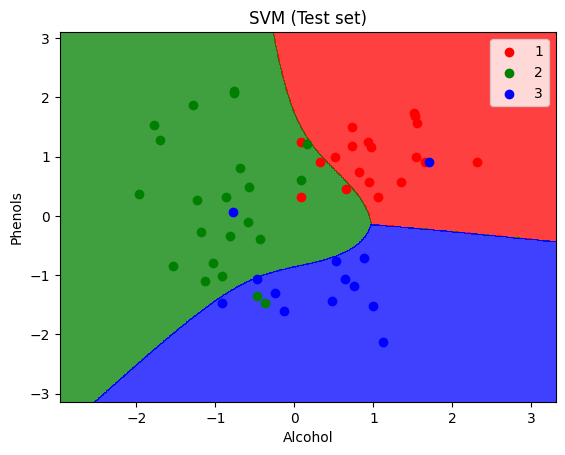

In [51]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()     

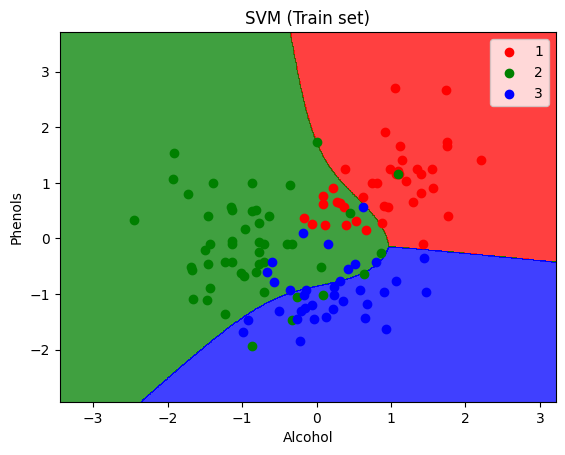

In [52]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()     

In [53]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[18  1  0]
 [ 6 14  2]
 [ 1  1 11]]
Training acc: 0.8306451612903226
Test acc: 0.7962962962962963


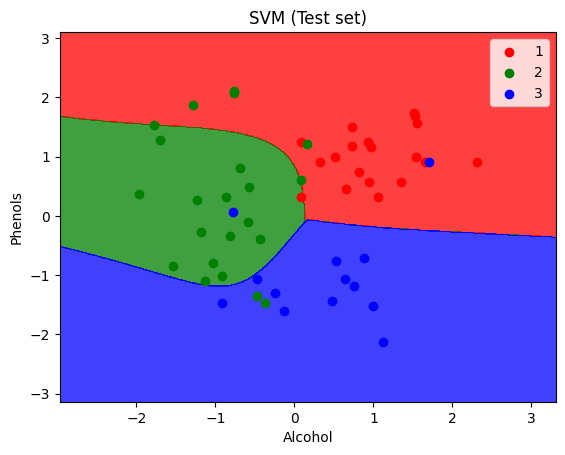

In [54]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()      

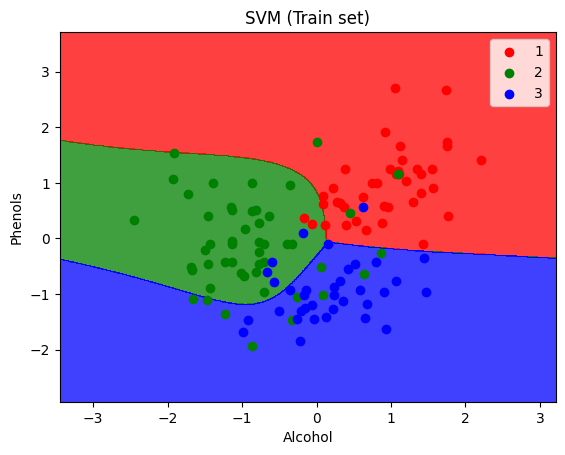

In [55]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()     

Najwyższy wskaźnik dokładności również dla tego zestawu danych jest dla jądra promieniowego.

